In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Reading Data

In [78]:
# df=pd.read_csv("Global_Earthquake_Data.csv")

# # Reading Less data for faster processing
# df=df[:1000]
# df.to_csv('Updated_Earthquake.csv')

In [79]:
df=pd.read_csv("Updated_Earthquake.csv")

<!-- time: the UTC date and time when the earthquake occurred (string)

latitude: the decimal latitude of the earthquake epicenter in degrees (float)

longitude: the decimal longitude of the earthquake epicenter in degrees (float)

depth: the depth of the earthquake in kilometers (float)

mag: the magnitude of the earthquake (float)

magType: the method or algorithm used to calculate the earthquake magnitude (string)

nst: the number of seismic stations used to calculate the earthquake magnitude (float)

gap: the largest azimuthal gap between azimuthally adjacent stations (float)

dmin: the horizontal distance from the epicenter to the nearest station in degrees (float)

rms: the root-mean-square (RMS) travel time residual, in seconds, of the earthquake location fit to the arrival times (float)

net: the ID of the seismic network (string)

id: the ID of the earthquake (string)

updated: the time in milliseconds since the epoch when the earthquake was most recently updated (string)

place: the name or description of the location where the earthquake occurred (string)

type: the type of seismic event (string)

horizontalError: the horizontal distance uncertainty of the earthquake location in kilometers (float)

depthError: the depth uncertainty of the earthquake location in kilometers (float)

magError: the uncertainty of the earthquake magnitude (float)

magNst: the number of seismic stations used to calculate the earthquake magnitude (float)

status: the status of the earthquake (string)

locationSource: the network that provided the earthquake location (string)

magSource: the network that provided the earthquake magnitude (string) -->

# Feature Engineering

In [80]:
# We can calculate energy released from earthquake using magnitude

df['energy'] = 10 ** (1.5 * df['mag'] + 4.8)

In [81]:
# We can add 3 more features using time column

df['year'] = pd.to_datetime(df['time']).dt.year
df['month'] = pd.to_datetime(df['time']).dt.month
df['day'] = pd.to_datetime(df['time']).dt.day

df.head(2)

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,depthError,magError,magNst,status,locationSource,magSource,energy,year,month,day
0,0,2023-02-26T23:58:05.052Z,41.805,79.8675,10.000,5.0,mb,46.0,91.0,1.293,...,1.897,0.078,52.0,reviewed,us,us,1.995262e+12,2023,2,26
1,1,2023-02-26T23:33:17.641Z,18.742,145.4868,200.365,4.8,mb,67.0,85.0,5.158,...,7.539,0.043,165.0,reviewed,us,us,1.000000e+12,2023,2,26


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1000 non-null   int64  
 1   time             1000 non-null   object 
 2   latitude         1000 non-null   float64
 3   longitude        1000 non-null   float64
 4   depth            1000 non-null   float64
 5   mag              1000 non-null   float64
 6   magType          1000 non-null   object 
 7   nst              993 non-null    float64
 8   gap              993 non-null    float64
 9   dmin             991 non-null    float64
 10  rms              999 non-null    float64
 11  net              1000 non-null   object 
 12  id               1000 non-null   object 
 13  updated          1000 non-null   object 
 14  place            953 non-null    object 
 15  type             1000 non-null   object 
 16  horizontalError  992 non-null    float64
 17  depthError     

In [83]:
df.describe()

,Unnamed: 0,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,energy,year,month,day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,993.000000,993.000000,991.000000,999.000000,992.000000,999.000000,982.000000,983.000000,1.000000e+03,1000.0,1000.000000,1000.000000
mean,499.500000,6.303951,39.305168,62.485561,4.816780,69.092649,86.023565,3.706985,0.712222,7.804900,3.961843,0.092199,55.492370,6.708864e+13,2023.0,1.515000,15.810000
std,288.819436,27.613082,108.871431,111.298168,0.390348,52.275783,41.224569,5.021837,0.202560,2.943103,2.491162,0.043594,65.951378,1.175034e+15,0.0,0.500025,7.725645
min,0.000000,-64.428900,-179.968900,0.000000,4.500000,12.000000,11.000000,0.012000,0.110000,0.470000,0.200000,0.023000,3.000000,3.548134e+11,2023.0,1.000000,1.000000
25%,249.750000,-14.822000,-42.054075,10.000000,4.600000,35.000000,55.000000,1.043500,0.570000,5.537500,1.864000,0.062000,18.000000,5.011872e+11,2023.0,1.000000,9.000000
50%,499.500000,2.836350,44.928300,18.819000,4.700000,57.000000,82.000000,2.024000,0.690000,7.650000,3.312000,0.083000,35.000000,7.079458e+11,2023.0,2.000000,16.000000
75%,749.250000,36.100400,127.068525,54.841500,5.000000,89.000000,112.000000,4.066500,0.830000,9.750000,5.696500,0.111000,67.000000,1.995262e+12,2023.0,2.000000,22.000000
max,999.000000,82.001600,179.996000,639.011000,7.800000,886.000000,227.000000,41.027000,1.570000,18.440000,17.872000,0.314000,647.000000,3.162278e+16,2023.0,2.000000,31.000000


# Checking for null values

In [84]:
df.isna().sum()

Unnamed: 0          0
time                0
latitude            0
longitude           0
depth               0
mag                 0
magType             0
nst                 7
gap                 7
dmin                9
rms                 1
net                 0
id                  0
updated             0
place              47
type                0
horizontalError     8
depthError          1
magError           18
magNst             17
status              0
locationSource      0
magSource           0
energy              0
year                0
month               0
day                 0
dtype: int64

# Dropping columns

In [85]:
from pandas.io.formats.info import DataFrameTableBuilderVerbose
todrop = ['nst', 'gap', 'dmin', 'rms', 'magNst']
df.drop(todrop, axis=1, inplace=True)

# EDA

In [86]:
# By Maginitude
df.sort_values(['year', 'mag', 'place','depth', 'time'], ascending=False)[mask].head(10)

,year,mag,place,depth,time
444,2023,7.8,"26 km ENE of Nurda??, Turkey",10.000,2023-02-06T01:17:34.362Z
990,2023,7.6,"Pulau Pulau Tanimbar, Indonesia",105.200,2023-01-09T17:47:35.050Z
406,2023,7.5,"4 km SSE of Ekinözü, Turkey",10.000,2023-02-06T10:24:49.258Z
815,2023,7.0,"156 km NW of Tobelo, Indonesia",28.855,2023-01-18T06:06:11.334Z
736,2023,6.8,"Santiago del Estero, Argentina",596.837,2023-01-20T22:09:39.053Z
66,2023,6.8,"67 km W of Murghob, Tajikistan",20.522,2023-02-23T00:37:40.397Z
442,2023,6.7,Central Turkey,10.708,2023-02-06T01:28:15.984Z
644,2023,6.4,NaN,595.013,2023-01-24T18:37:00.100Z
859,2023,6.3,"Bonin Islands, Japan region",405.000,2023-01-16T04:49:51.935Z
97,2023,6.3,"3 km SSW of Uzunba?, Turkey",16.000,2023-02-20T17:04:29.441Z


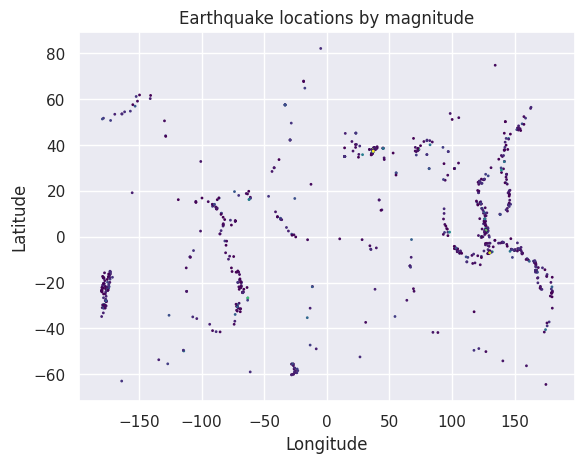

In [87]:
plt.scatter(df['longitude'], df['latitude'], s=1, c=df['mag'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquake locations by magnitude')
plt.show()


In [88]:
# Deepest Earthquakes
df.sort_values('depth', ascending=False)[mask].head(10)

,year,mag,place,depth,time
486,2023,4.6,south of the Fiji Islands,639.011,2023-02-02T21:20:42.988Z
869,2023,4.5,"75 km ENE of Levuka, Fiji",617.888,2023-01-15T17:36:47.239Z
310,2023,4.8,Fiji region,613.484,2023-02-07T16:11:16.763Z
192,2023,4.5,Fiji region,613.023,2023-02-15T14:04:11.472Z
922,2023,5.5,south of the Fiji Islands,598.301,2023-01-12T16:28:51.520Z
736,2023,6.8,"Santiago del Estero, Argentina",596.837,2023-01-20T22:09:39.053Z
644,2023,6.4,NaN,595.013,2023-01-24T18:37:00.100Z
870,2023,5.0,south of the Fiji Islands,582.579,2023-01-15T17:09:39.111Z
283,2023,4.7,Fiji region,582.557,2023-02-08T17:07:43.712Z
968,2023,5.1,"29 km NE of Suncho Corral, Argentina",582.454,2023-01-10T19:47:15.101Z


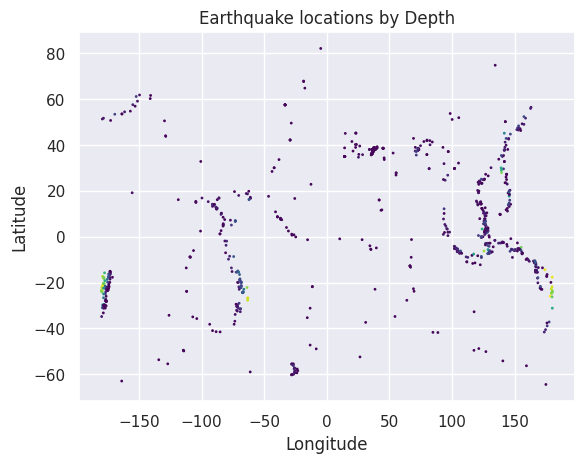

In [89]:

plt.scatter(df['longitude'], df['latitude'], s=1, c=df['depth'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquake locations by Depth')
plt.show()


In [90]:
# Most shallow earthquakes

df.sort_values('depth')[mask].head(10)

,year,mag,place,depth,time
35,2023,4.5,"7 km NE of Sincik, Turkey",0.000,2023-02-24T20:25:28.510Z
292,2023,4.5,"15 km E of Nurhak, Turkey",3.530,2023-02-08T11:24:00.758Z
305,2023,5.0,"6 km SE of Nurhak, Turkey",3.744,2023-02-07T21:21:25.795Z
353,2023,4.6,"5 km WNW of Çelikhan, Turkey",3.951,2023-02-06T19:40:16.019Z
251,2023,4.6,Central Turkey,4.748,2023-02-11T07:55:41.897Z
537,2023,4.5,"118 km E of McCarthy, Alaska",5.000,2023-01-30T09:02:46.541Z
277,2023,4.8,Turkey-Syria border region,5.145,2023-02-09T07:18:16.806Z
364,2023,4.7,"14 km SSE of Kahramanmara?, Turkey",5.178,2023-02-06T16:28:08.698Z
120,2023,4.6,"8 km SW of Ye?ilyurt, Turkey",5.478,2023-02-19T12:04:33.973Z
397,2023,4.5,"14 km WSW of Göksun, Turkey",5.716,2023-02-06T11:50:04.398Z


In [91]:
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
fig = px.scatter_geo(df, 
                     lat='latitude', 
                     lon='longitude', 
                     size='depth', 
                     color='mag', 
                     hover_name='place',
                     projection='natural earth',
                     title='Earthquakes by Magnitude')

fig.update_geos(
    showland=True,
    landcolor='white',
    showocean=True,
    oceancolor='lightblue',
    showcountries=True,
    countrycolor='gray'
)

fig.update_traces(
    marker=dict(
        symbol='circle',
        opacity=0.7,
        line=dict(width=1, color='black')
    )
)

fig.show()


Text(0.5, 1.0, 'Distribution Showcasing Magnitude and Freq')

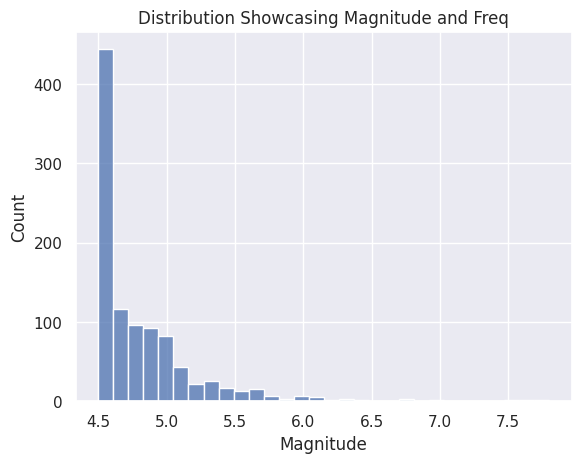

In [93]:
# add x and y labels

ax=sns.histplot(data=df, x='mag', bins=30)
ax.set_xlabel('Magnitude')
ax.set_ylabel('Count')
ax.set_title("Distribution Showcasing Magnitude and Freq")

Text(0.5, 1.0, 'Freq of Different Earthquake Measuring techniques')

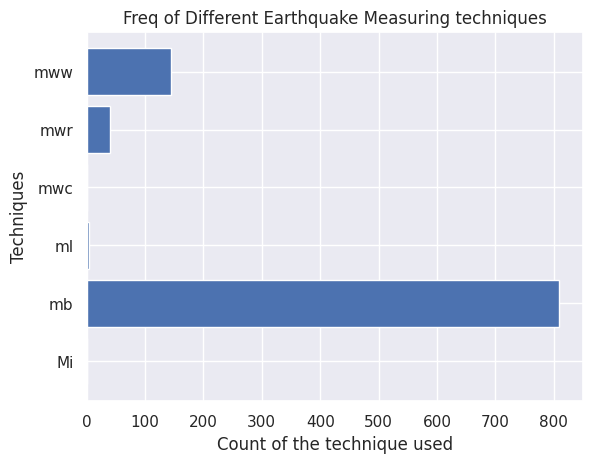

In [94]:
grouped_magtype=df.groupby(df["magType"])["magType"].count()
plt.barh(grouped_magtype.index,grouped_magtype.values)
plt.xlabel("Count of the technique used")
plt.ylabel("Techniques")
plt.title("Freq of Different Earthquake Measuring techniques")

Text(0.5, 1.0, 'Debth vs Year')

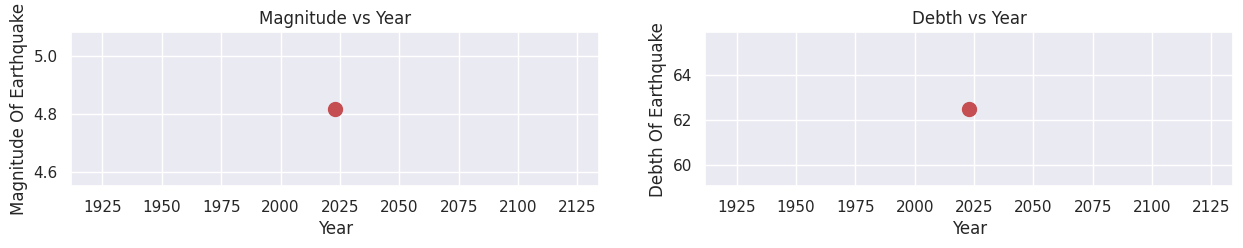

In [95]:
# create a figure with 1 row and 3 columns, and a size of 12x8 inches
fig, ax = plt.subplots(1, 2, figsize=(15, 2))

# group the data by year and calculate the mean magnitude for each year
grouped_year = df.groupby(df["year"])["mag"].mean()

# get the year with the largest average magnitude
top_1_year = grouped_year.nlargest(1).index[0]

# plot the year on the x-axis and the average magnitude on the y-axis in the first subplot
ax[0].plot(grouped_year.index, grouped_year.values)
ax[0].plot(top_1_year, grouped_year.loc[top_1_year], 'ro', markersize=10)
ax[0].set_xlabel("Year")  # set the x-axis label
ax[0].set_ylabel("Magnitude Of Earthquake")  # set the y-axis label
ax[0].set_title("Magnitude vs Year")  # set the title of the subplot

#----------------------------------------------------------------------------------------------------
# group the data by year and calculate the mean magnitude for each year
grouped_year = df.groupby(df["year"])["depth"].mean()

# get the year with the largest average magnitude
top_1_year = grouped_year.nlargest(1).index[0]

# plot the year on the x-axis and the average magnitude on the y-axis in the first subplot
ax[1].plot(grouped_year.index, grouped_year.values)
ax[1].plot(top_1_year, grouped_year.loc[top_1_year], 'ro', markersize=10)
ax[1].set_xlabel("Year")  # set the x-axis label
ax[1].set_ylabel("Debth Of Earthquake")  # set the y-axis label
ax[1].set_title("Debth vs Year")  # set the title of the subplot



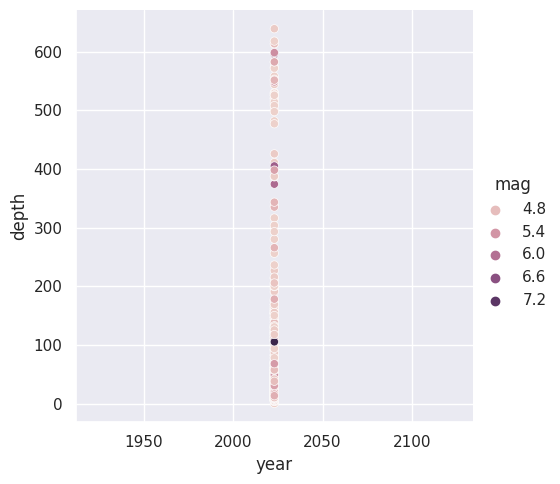

In [96]:
sns.relplot(data=df, x='year', y='depth', hue='mag')
plt.show()

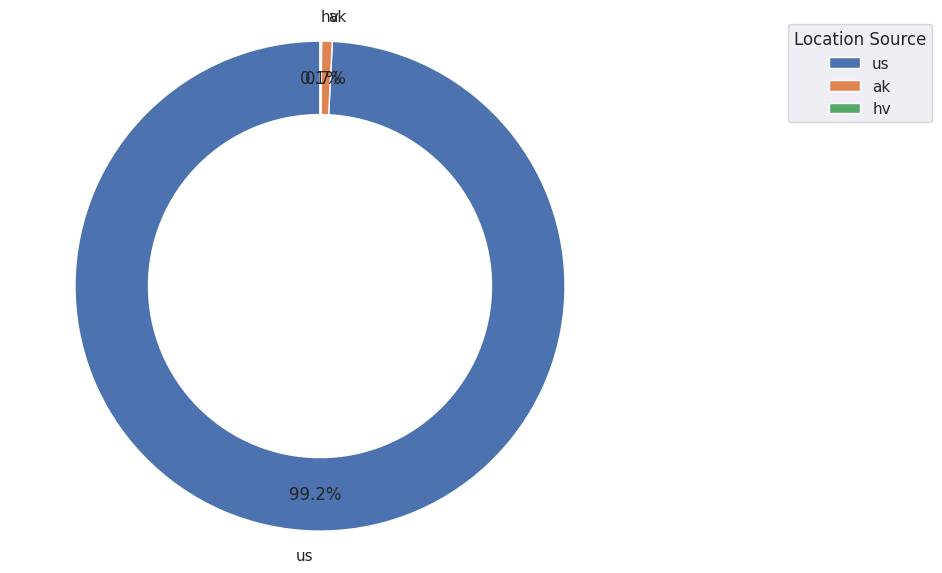

In [97]:
import matplotlib.pyplot as plt

grouped_locationSource = df.groupby(df["locationSource"])["locationSource"].count()
labels = grouped_locationSource.nlargest(3).index
sizes = grouped_locationSource.nlargest(3).values

fig, ax = plt.subplots(figsize=(8, 7))

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
ax.axis('equal')

# Add circle in the middle to create a donut chart
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.legend(title="Location Source", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


In [98]:
df["mag"]=df["mag"].round()
df["mag"].unique()

array([5., 4., 6., 7., 8.])

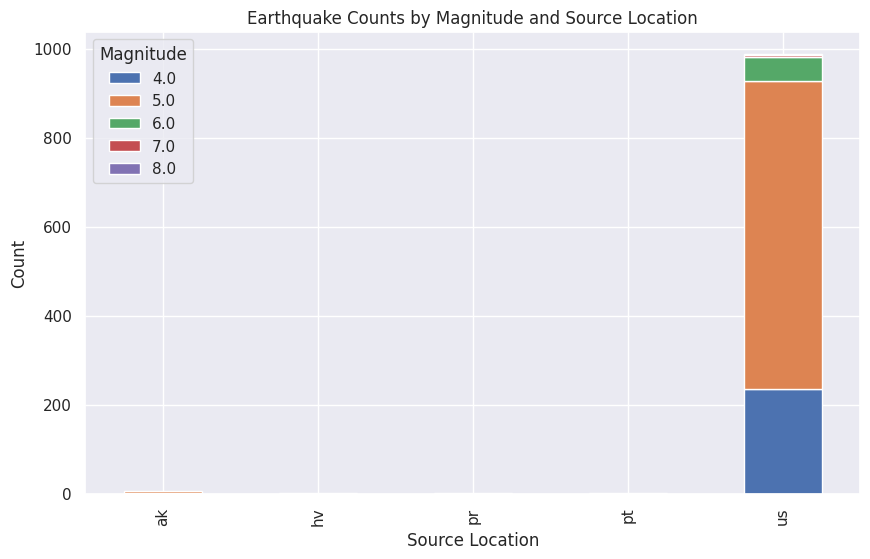

In [99]:
grouped_mag_location=df.groupby(['locationSource', 'mag'])['mag'].count()
grouped_mag_location=grouped_mag_location.nlargest(10)

# create a pivot table of grouped data
pivot = grouped_mag_location.unstack()

# create stacked bar plot
sns.set(style='darkgrid')
pivot.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Earthquake Counts by Magnitude and Source Location')
plt.xlabel('Source Location')
plt.ylabel('Count')
plt.legend(title='Magnitude')
plt.show()


# Checking for relation between different features

<ipython-input-100-aa4f4450a243>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

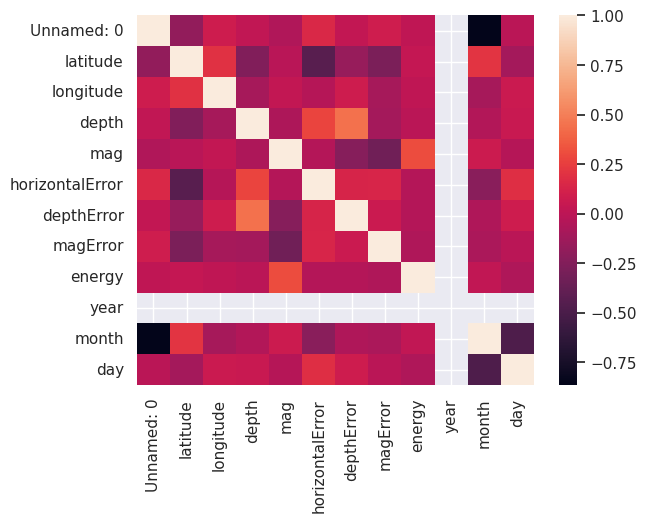

In [100]:
sns.heatmap(df.corr())

In [101]:
# sns.pairplot(df)

# Text-Train Split

In [103]:
from sklearn.model_selection import train_test_split

y=df["mag"]
df.drop(columns=['mag'],inplace=True)

X=df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: ignored

In [ ]:
X_test.head(2)

In [ ]:
y_train.head(2)

In [ ]:
X.dtypes

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# reshape the magType column to a 2D array
magtype_train = X_train['magType'].values.reshape(-1, 1)
magtype_test = X_test['magType'].values.reshape(-1, 1)

# create an instance of the OneHotEncoder class with handle_unknown='ignore'
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# fit and transform the training data
one_hot_X_train = one_hot_encoder.fit_transform(X_train[['magType']])

# transform the test data using the trained encoder
one_hot_X_test = one_hot_encoder.transform(X_test[['magType']])

# convert the transformed data to pandas dataframe
one_hot_train_df = pd.DataFrame(one_hot_X_train.toarray())
one_hot_test_df = pd.DataFrame(one_hot_X_test.toarray())

# concatenate the encoded dataframes with the original dataframes
X_train_encoded = pd.concat([X_train.drop(columns=['magType']), one_hot_train_df], axis=1)
X_test_encoded = pd.concat([X_test.drop(columns=['magType']), one_hot_test_df], axis=1)



print(X_train_encoded.shape)
print(X_test_encoded.shape)

In [ ]:
df.dtypes

# Let's see what are the import features 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# create a linear regression model
model = LinearRegression()

# create an RFE object with a linear regression estimator and set the number of features to be selected
rfe = RFE(estimator=model, n_features_to_select=50, step=1)

X_train_encoded.columns = X_train.columns.astype(str)

# fit the RFE object to the dataset
X_train_rfe=rfe.fit_transform(X_train_encoded, y_train)
X_test_rfe = rfe.transform(X_test_encoded)

In [ ]:
# fit the linear regression model to the reduced feature set
model.fit(X_train_rfe, y_train)

In [ ]:
# Predicting accuracy
from sklearn.metrics import mean_squared_error, r2_score


score=[]
def checkModelAccuracy(result):
  # calculate the mean squared error
  mse = mean_squared_error(y_test, result)
  print(f'Mean squared error: {mse:.2f}')

  # calculate the root mean squared error
  rmse = mean_squared_error(y_test, result, squared=False)
  print(f'Root mean squared error: {rmse:.2f}')

  # calculate the R-squared value
  r2 = r2_score(y_test, result)
  print(f'R-squared: {r2:.2f}')
    
# Lets try different machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

names = ["Linear Regression", "Gradient Boosting", "Random Forest"]

classifiers = [
    LinearRegression(),
    GradientBoostingRegressor(),
    RandomForestRegressor()
    ]

 
for name, clf in zip(names, classifiers):
    if name == "Linear Regression":
        print("Linear Regression")
        clf = DecisionTreeClassifier(random_state=0)
        clf.fit(X_train_rfe,y_train)
        linearRegressionResult=clf.predict(X_test_rfe)
        checkModelAccuracy(linearRegressionResult)
        plt.show()
        print("------------------------------------------------------------------------")
    elif name == "Logistic Regression":
        print("Gradient Boosting")
        clf = GradientBoostingRegressor()
        clf.fit(X_train_rfe,y_train)
        Gradient=clf.predict(X_test_rfe)
        checkModelAccuracy(Gradient)
        plt.show()
        print("------------------------------------------------------------------------")
    elif name == "Random Forest":
        print("Random Forest")
        clf = RandomForestRegressor(random_state=0)
        clf.fit(X_train_rfe,y_train)
        randomForestResult=clf.predict(X_test_rfe)
        checkModelAccuracy(randomForestResult)
        plt.show()
        print("------------------------------------------------------------------------")


# Preforming RFE to extract useful features